# **4. BIOPYTHON.2**

В данной практической работе мы создадим простое приложение Biopython для анализа файла биоинформатики и распечатки содержимого.

Это поможет нам понять общую концепцию биопиона и то, как он помогает в области биоинформатики.

[ТЕОРИЯ](https://sites.google.com/view/bioinfbsu/%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B8/4-biopython?authuser=0)

## **Шаг 1**

Сначала создайте пример файла последовательности «example.fasta» и поместите в него содержимое ниже.

>sp|P25730|FMS1_ECOLI CS1 fimbrial subunit A precursor (CS1 pilin)
MKLKKTIGAMALATLFATMGASAVEKTISVTASVDPTVDLLQSDGSALPNSVALTYSPAV
NNFEAHTINTVVHTNDSDKGVVVKLSADPVLSNVLNPTLQIPVSVNFAGKPLSTTGITID
SNDLNFASSGVNKVSSTQKLSIHADATRVTGGALTAGQYQGLVSIILTKSTTTTTTTKGT

>sp|P15488|FMS3_ECOLI CS3 fimbrial subunit A precursor (CS3 pilin)
MLKIKYLLIGLSLSAMSSYSLAAAGPTLTKELALNVLSPAALDATWAPQDNLTLSNTGVS
NTLVGVLTLSNTSIDTVSIASTNVSDTSKNGTVTFAHETNNSASFATTISTDNANITLDK
NAGNTIVKTTNGSQLPTNLPLKFITTEGNEHLVSGNYRANITITSTIKGGGTKKGTTDKK

1. Open the Terminal.
2. Use the nano editor:

 `nano example.fasta`
3. Enter your FASTA content.
4. Save and exit:
    - Press Ctrl+O to save.
    - Press Enter to confirm the filename.
    - Press Ctrl+X to exit.

Расширение fasta относится к формату файла последовательности. FASTA происходит от программного обеспечения для биоинформатики FASTA и, следовательно, получает свое имя. Формат FASTA состоит из нескольких последовательностей, расположенных одна за другой, и каждая последовательность будет иметь свой собственный идентификатор, имя, описание и фактические данные последовательности.

## **ШАГ 2**

Создайте новый скрипт на Python * simple_example.py “, введите приведенный ниже код и сохраните его.

In [ ]:
!pip install Bio

In [28]:
from Bio.SeqIO import parse
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

path_file = "example.fasta"

file = open(path_file, 'r')

records = parse(file, "fasta")
for record in records:
    print(type(record))
    print(f'''
    Id: {record.id}
    Name: {record.name}
    Description: {record.description}
    Annotations: {record.annotations}
    Sequence Data: {record.seq}
    ''') # missing 'Sequence Alphabet: {record.seq.alphabet}' (no attribute)

<class 'Bio.SeqRecord.SeqRecord'>

    Id: sp|P25730|FMS1_ECOLI
    Name: sp|P25730|FMS1_ECOLI
    Description: sp|P25730|FMS1_ECOLI CS1 fimbrial subunit A precursor (CS1 pilin)
    Annotations: {}
    Sequence Data: MKLKKTIGAMALATLFATMGASAVEKTISVTASVDPTVDLLQSDGSALPNSVALTYSPAVNNFEAHTINTVVHTNDSDKGVVVKLSADPVLSNVLNPTLQIPVSVNFAGKPLSTTGITIDSNDLNFASSGVNKVSSTQKLSIHADATRVTGGALTAGQYQGLVSIILTKSTTTTTTTKGT 
    
<class 'Bio.SeqRecord.SeqRecord'>

    Id: sp|P15488|FMS3_ECOLI
    Name: sp|P15488|FMS3_ECOLI
    Description: sp|P15488|FMS3_ECOLI CS3 fimbrial subunit A precursor (CS3 pilin)
    Annotations: {}
    Sequence Data: MLKIKYLLIGLSLSAMSSYSLAAAGPTLTKELALNVLSPAALDATWAPQDNLTLSNTGVSNTLVGVLTLSNTSIDTVSIASTNVSDTSKNGTVTFAHETNNSASFATTISTDNANITLDKNAGNTIVKTTNGSQLPTNLPLKFITTEGNEHLVSGNYRANITITSTIKGGGTKKGTTDKK 
    


In [6]:
type(records)

Bio.SeqIO.FastaIO.FastaIterator

**Bio.SeqIO.FastaIO.FastaIterator** является однократным итератором (one-time iterator). Это означает, что его можно итерировать только один раз, после чего он "исчерпывается".

В новых версиях Biopython атрибут alphabet был удален, так как информация об алфавите автоматически определяется из контекста последовательности.

**Строка 1** импортирует класс разбора, доступный в модуле Bio.SeqIO. Модуль Bio.SeqIO используется для чтения и записи файла последовательности в другом формате, а класс parse используется для анализа содержимого файла последовательности.

**Строка 2** импортирует класс SeqRecord, доступный в модуле Bio.SeqRecord. Этот модуль используется для управления записями последовательности, а класс SeqRecord используется для представления определенной последовательности, доступной в файле последовательности.

**Строка 3** импортирует класс Seq, доступный в модуле Bio.Seq. Этот модуль используется для манипулирования данными последовательности, а класс Seq используется для представления данных последовательности конкретной записи последовательности, доступной в файле последовательности.

**Строка 5** открывает файл «example.fasta» с помощью обычной функции python, open.

**Строка 7** анализирует содержимое файла последовательности и возвращает содержимое в виде списка объекта SeqRecord.

**Строка 9-15** циклически перебирает записи, используя python for loop, и печатает атрибуты записи последовательности (SqlRecord), такие как id, имя, описание, данные последовательности и т. Д.

**Строка 15** печатает тип последовательности, используя класс Alphabet.

Следующая функция определяет тип последовательности:

In [29]:
def identify_sequence_type(seq):
    # Определение типа последовательности
    dna_bases = set("ATCGU")  # Основа для ДНК и РНК
    protein_bases = set("ACDEFGHIKLMNPQRSTVWY")  # Основные аминокислоты
    # Если последовательность содержит только символы ДНК/РНК, она нуклеотидная
    if set(seq).issubset(dna_bases):
        if "U" in seq:
            return "RNA"
        else:
            return "DNA"
    # Если содержит только аминокислоты, это белок
    elif set(seq).issubset(protein_bases):
        return "Protein"
    else:
        return "Unknown"


In [35]:
file = open(path_file, 'r')
records = parse(file, "fasta")

for record in records:
    print(identify_sequence_type(str(record.seq)))

Protein
Protein


## **ШАГ 3**

Откройте командную строку и перейдите в папку, содержащую файл последовательности, «example.fasta» и выполните следующую команду:

`> python simple_example.py`

Python запускает скрипт и печатает все данные последовательности, доступные в файле примера, «example.fasta». Вывод будет похож на следующий контент:


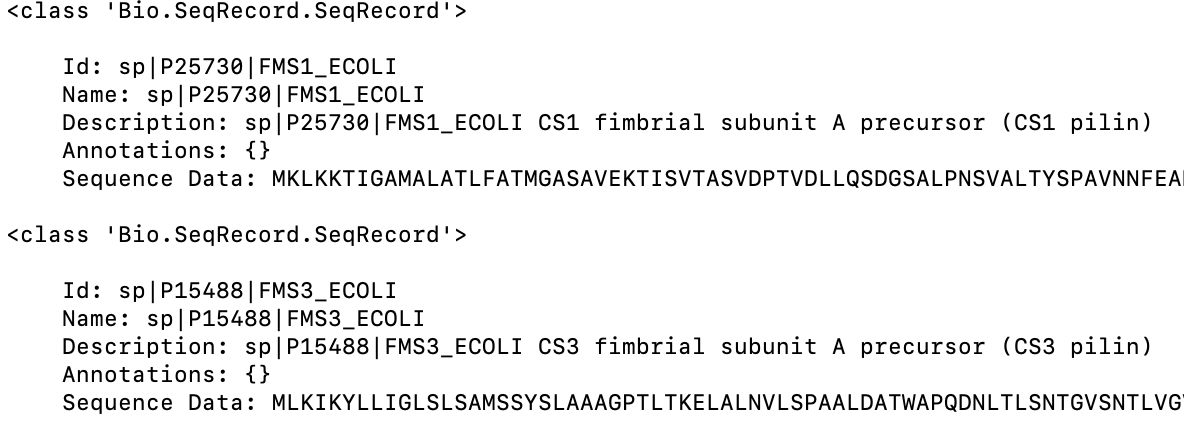

В этом примере мы видели три класса: parse, SeqRecord и Seq. Эти три класса предоставляют большую часть функциональности .